Second Hands On Humaira Akhtari

Importing Necessary Libraries

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

Loading the DataSet

In [6]:
#dataset imported from https://www.kaggle.com
nyCity = pd.read_csv('/content/NY-House-Dataset.csv')
print(nyCity.info())
print (nyCity.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [7]:
#Finding the null values and its sum
missing=nyCity.isnull().sum()
print(missing)

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


In [47]:
#Chcking again for null values and its sum
nyCity.isnull().sum()

,0
TYPE,0
PRICE,0
BEDS,0
BATH,0
PROPERTYSQFT,0
ADDRESS,0
STATE,0
MAIN_ADDRESS,0
ADMINISTRATIVE_AREA_LEVEL_2,0
STREET_NAME,0


In [60]:
# Classification models: First take the median of the house prices and categorize the price values into two values.
#if the median house price is 4000, then all the values above and equal to 4000 will be one category and values below 4000 will be another category.
median_price = nyCity['PRICE'].median()
nyCity['classes'] = (nyCity['PRICE'] >= median_price).astype(int)
nyCity

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,STREET_NAME,LATITUDE,LONGITUDE,classes
0,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,East 55th Street,40.761255,-73.974483,0
1,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,40.766393,-73.980991,1
2,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,Staten Island,40.541805,-74.196109,0
3,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,40.761398,-73.974613,0
4,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,40.767224,-73.969856,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,Manhattan,40.774350,-73.955879,0
4797,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,Queens,40.732538,-73.860152,0
4798,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,40.745882,-74.003398,1
4799,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Flushing,40.742770,-73.872752,0


In [45]:
#Removing duplicates if any
duplicates=nyCity.duplicated()
print("The number of duplicate columns are ",duplicates.sum())

The number of duplicate columns are  214


In [ ]:
#Dropping the unnecessary fields
nyCity = nyCity.drop(['BROKERTITLE','ADMINISTRATIVE_AREA_LEVEL_2 ','LOCALITY','SUBLOCALITY','LONG_NAME','FORMATTED_ADDRESS','LATITUDE ','LONGITUDE '],axis=1,errors='ignore')
nyCity

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,STREET_NAME,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,East 55th Street,40.761255,-73.974483
1,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,40.766393,-73.980991
2,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,Staten Island,40.541805,-74.196109
3,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,Manhattan,40.774350,-73.955879
4797,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,Queens,40.732538,-73.860152
4798,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,40.745882,-74.003398
4799,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Flushing,40.742770,-73.872752


In [11]:
# Get a list of all columns
all_columns = nyCity.columns.tolist()

# Identify numerical columns
numerical_columns = [col for col in all_columns if nyCity[col].dtype in ['int64', 'float64']]

# Identify categorical columns
categorical_columns = [col for col in all_columns if nyCity[col].dtype == 'object']

# Print the results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
Categorical Columns: ['TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'STREET_NAME']


In [ ]:
#Making the split using 30 70 ratio and setting the random state to 42
X = nyCity.drop(['classes','PRICE'], axis=1)
y = nyCity['classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Converting the categorical features in the X_train DataFrame into numerical representations. One-hot encoding is a common technique to achieve this.

In [77]:
categorical_cols = ['TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'STREET_NAME']
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(nyCity[categorical_cols])

# Create a DataFrame from encoded data
encoded_columns = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=nyCity.index)

# Combine numerical data and encoded categorical data
X = pd.concat([nyCity[numerical_cols], df_encoded], axis=1)
y = nyCity['PRICE']
df_encoded


,TYPE_Coming Soon,TYPE_Condo for sale,TYPE_Condop for sale,TYPE_Contingent,TYPE_For sale,TYPE_Foreclosure,TYPE_House for sale,TYPE_Land for sale,TYPE_Mobile house for sale,TYPE_Multi-family home for sale,...,STREET_NAME_West 65th Street,STREET_NAME_West Brighton,STREET_NAME_West Bronx,STREET_NAME_Westchester Square,STREET_NAME_Whitestone,STREET_NAME_Williamsburg,STREET_NAME_Windsor Terrace,STREET_NAME_Woodhaven,STREET_NAME_Woodside,STREET_NAME_Woodstock
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Applying the LOGISTIC REGRESSION MODEL to the training set and then making predictions using the test set.

In [76]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=100, random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)
# Predict on the testing set
y_pred = logistic_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating the model by calculating the accuracy, precison, recall and f1score

In [78]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       717
           1       0.83      0.83      0.83       724

    accuracy                           0.83      1441
   macro avg       0.83      0.83      0.83      1441
weighted avg       0.83      0.83      0.83      1441

Confusion Matrix:
 [[590 127]
 [121 603]]


In [81]:
# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)
# Predict on the testing set
y_pred = decision_tree.predict(X_test)

predictions=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
predictions

,Actual,Predicted
596,0,1
4507,1,0
3049,1,1
2957,1,0
8,0,0
...,...,...
2669,0,0
3094,1,1
2658,1,0
2809,1,1


Calculating the accuracy which is almost the same.

In [90]:
import pandas as pd

# Convert predictions and actual values to a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})

# Print the first few rows to see the actual vs. predicted values
print(comparison_df.head())


      Actual  Predicted
596        0   0.285828
4507       1   0.409910
3049       1   0.638633
2957       1   0.792767
8          0  -0.123344


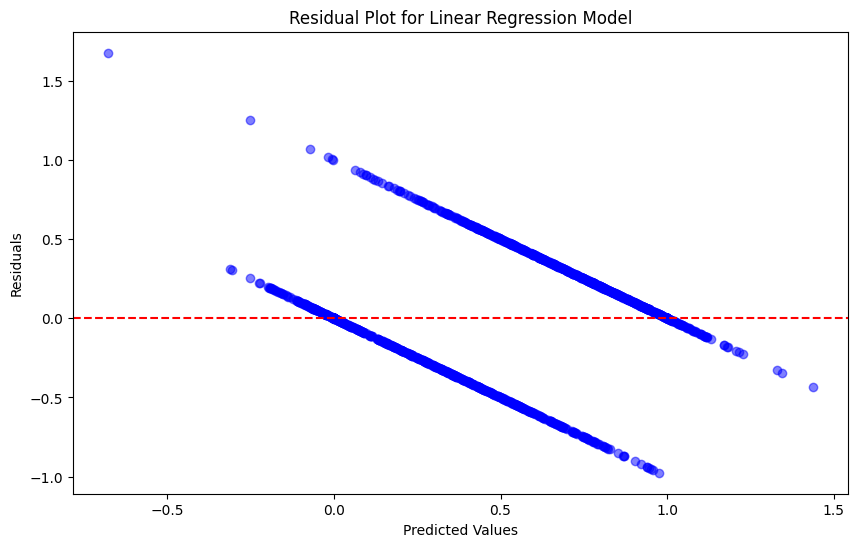

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_linear

# Plot residuals to see how scattered data is
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals, color="blue", alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression Model")
plt.show()


In [82]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       717
           1       0.80      0.83      0.82       724

    accuracy                           0.81      1441
   macro avg       0.81      0.81      0.81      1441
weighted avg       0.81      0.81      0.81      1441

Confusion Matrix:
 [[566 151]
 [120 604]]


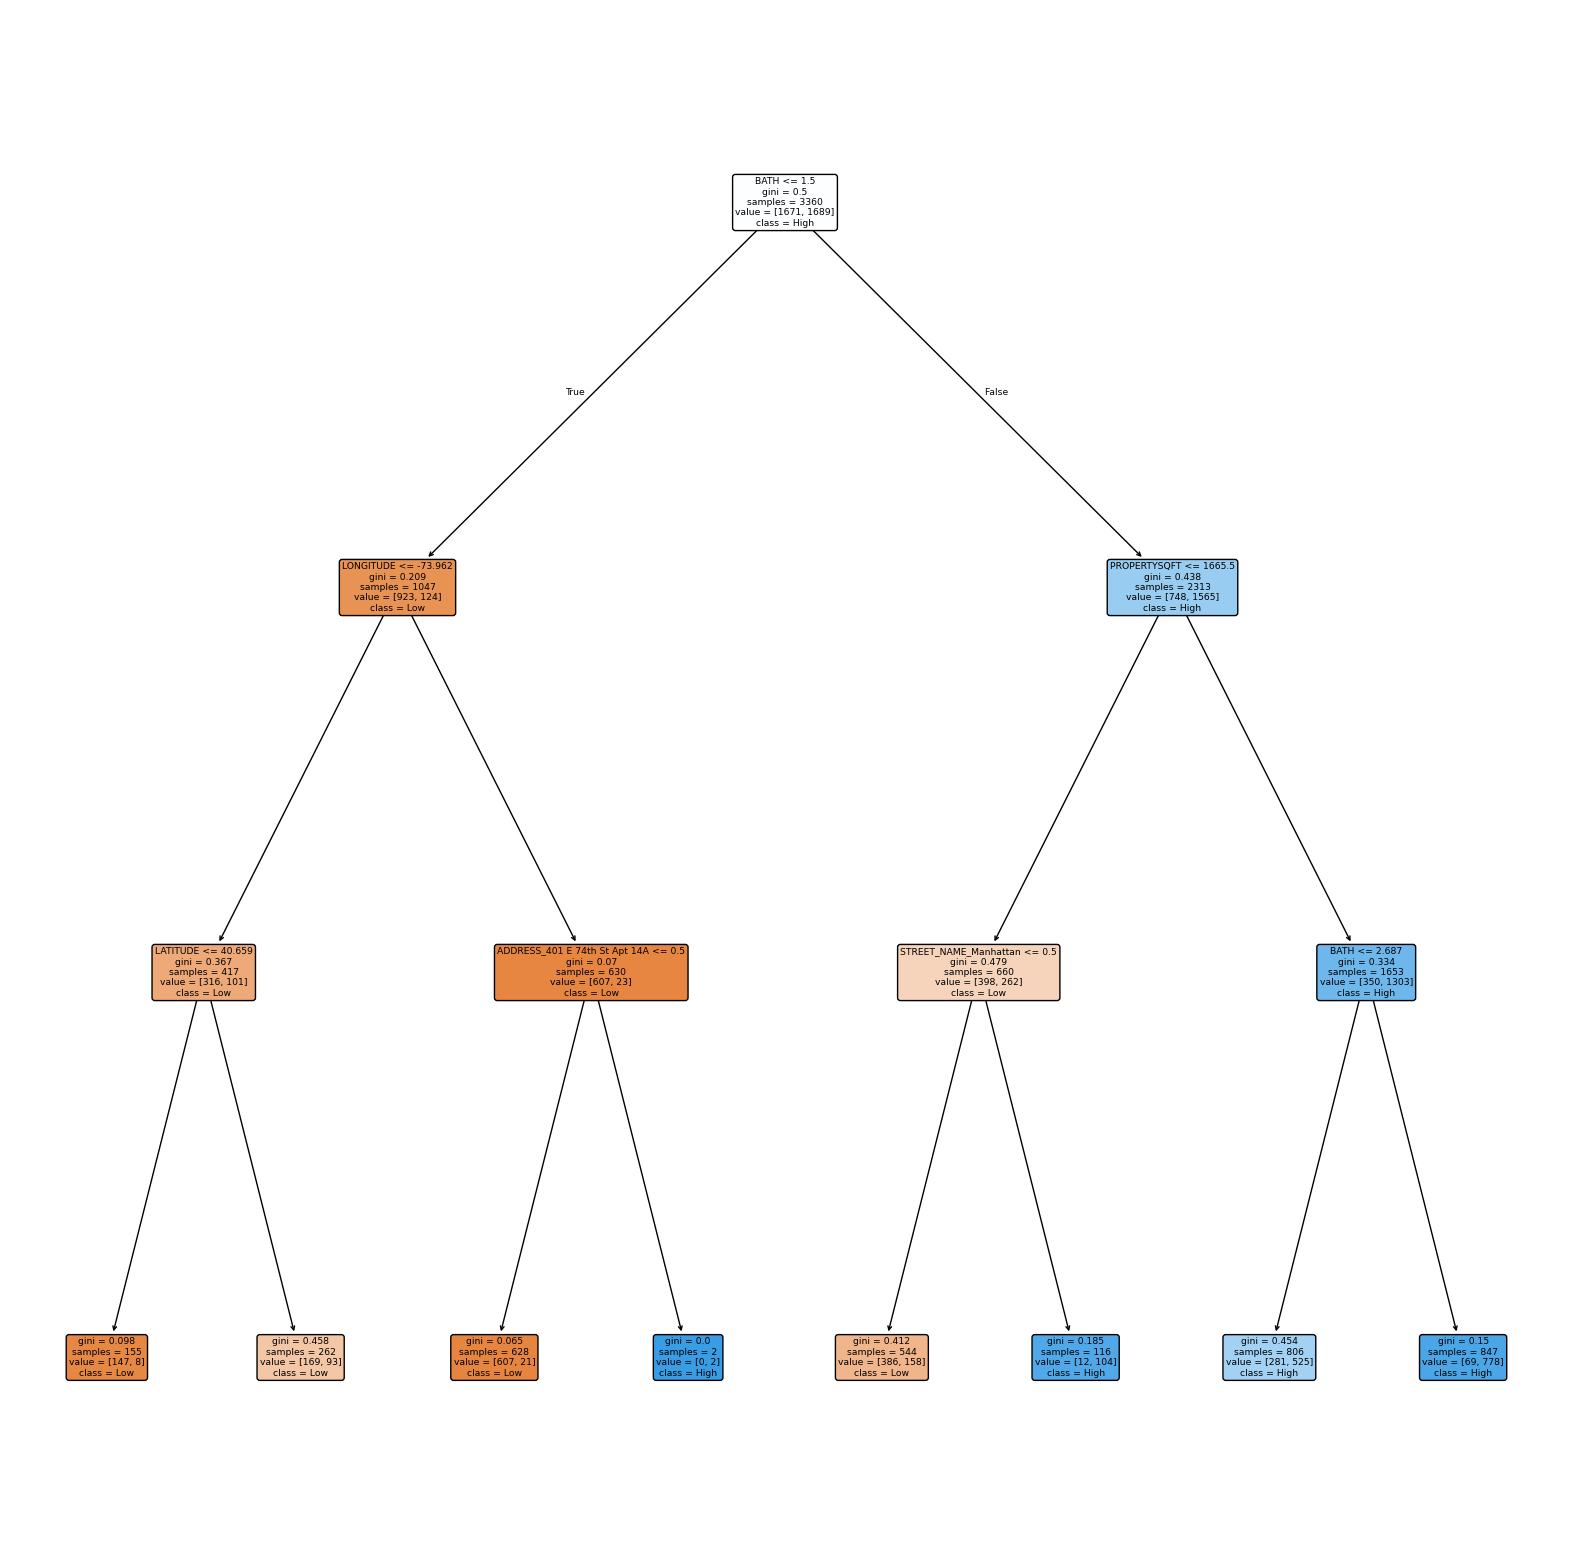

In [92]:
#plot the decision tree with width and height of 20,20
plt.figure(figsize=(20, 20))
tree.plot_tree(decision_tree,
               feature_names=X_train.columns,
               class_names=['Low', 'High'],
               filled=True,
               rounded=True)
plt.show()

In [93]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest Regressor
print("Random Forest Regressor Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest Regressor R^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor Mean Squared Error: 0.11172796668979876
Random Forest Regressor R^2 Score: 0.553077586937593


In [98]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# Sort feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
1,BATH,0.114689
2,PROPERTYSQFT,0.086257
0,BEDS,0.071368
4,LONGITUDE,0.060402
3,LATITUDE,0.046104
...,...,...
6158,MAIN_ADDRESS_61-20 Grand Central Pkwy Unit C10...,0.000000
2503,ADDRESS_5601 Riverdale Ave Apt 2B,0.000000
5674,"MAIN_ADDRESS_42 W 138th St Apt 31New York, NY ...",0.000000
1985,ADDRESS_3747 Amboy Rd Apt 2A,0.000000


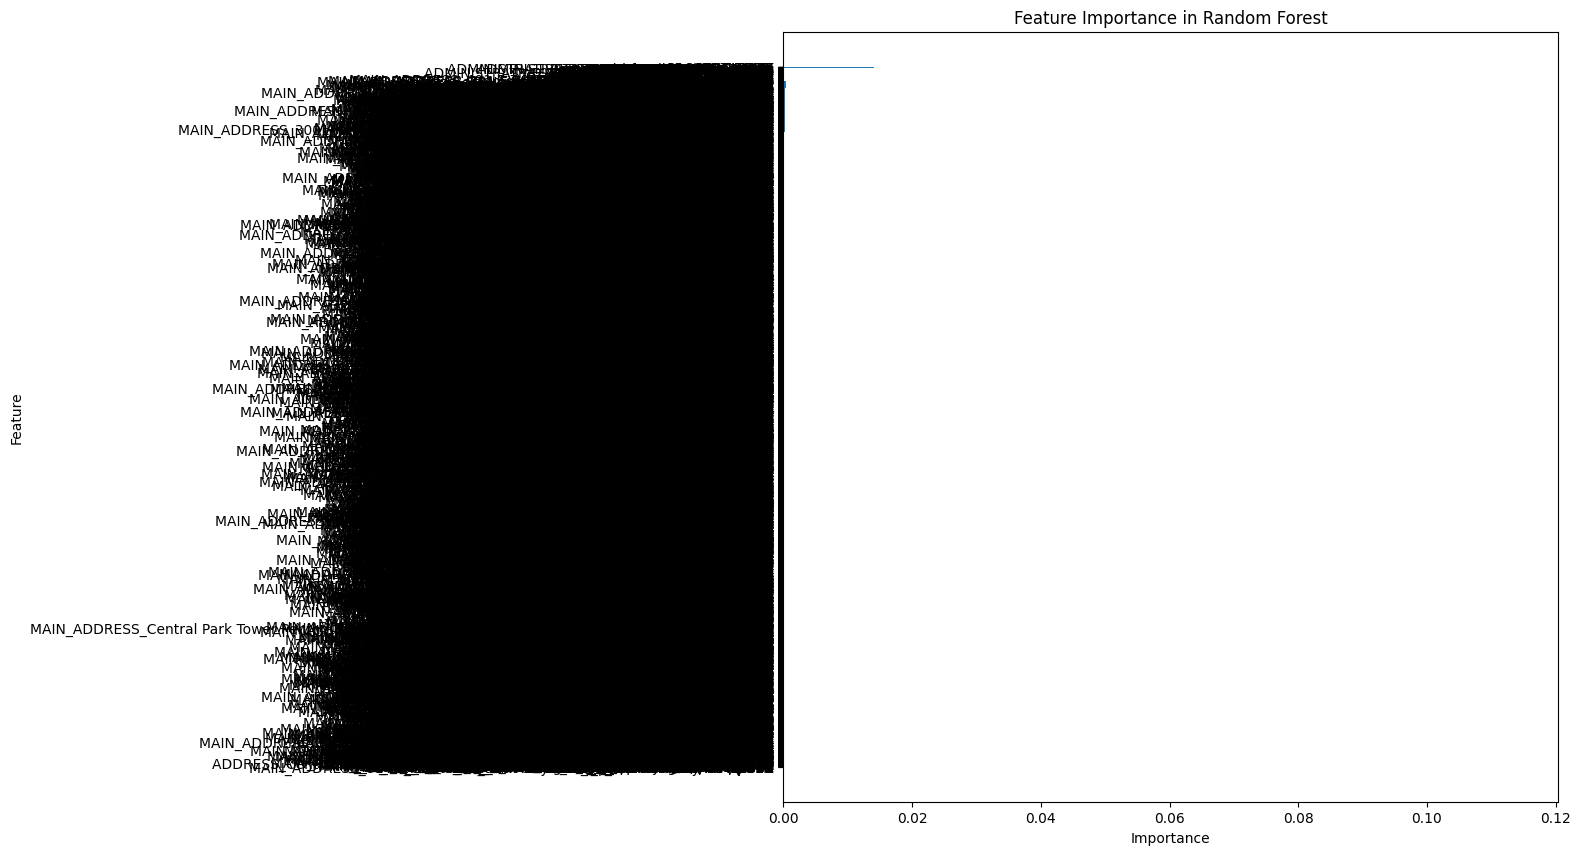

In [100]:
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [101]:
# Create a RandomForestRegressor with regularization parameters
regressor = RandomForestRegressor(
    n_estimators=100,          # Number of trees
    max_depth=10,              # Limit the depth of each tree
    min_samples_split=5,       # Minimum samples required to split an internal node
    min_samples_leaf=4,        # Minimum samples required to be at a leaf node
    max_features='sqrt',       # Use the square root of the total features at each split
    random_state=42
)

# Fit the model
regressor.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Regressor Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Random Forest Regressor R^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor Mean Squared Error: 0.2043253468022695
Random Forest Regressor R^2 Score: 0.553077586937593
